Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

Complete attribute documentation:
1 id: patient identification number
2 ccf: social security number (I replaced this with a dummy value of 0)
  3 age: age in years
  4 sex: sex (1 = male; 0 = female)
5 painloc: chest pain location (1 = substernal; 0 = otherwise)
6 painexer (1 = provoked by exertion; 0 = otherwise)
7 relrest (1 = relieved after rest; 0 = otherwise)
8 pncaden (sum of 5, 6, and 7)
9 cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
11 htn
12 chol: serum cholestoral in mg/dl
13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
14 cigs (cigarettes per day)
15 years (number of years as a smoker)
16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
17 dm (1 = history of diabetes; 0 = no such history)
18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
19 restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
20 ekgmo (month of exercise ECG reading)
21 ekgday(day of exercise ECG reading)
22 ekgyr (year of exercise ECG reading)
23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
28 proto: exercise protocol
1 = Bruce
2 = Kottus
3 = McHenry
4 = fast Balke
5 = Balke
6 = Noughton
7 = bike 150 kpa min/min (Not sure if "kpa min/min" is what was written!)
8 = bike 125 kpa min/min
9 = bike 100 kpa min/min
10 = bike 75 kpa min/min
11 = bike 50 kpa min/min
12 = arm ergometer
29 thaldur: duration of exercise test in minutes
30 thaltime: time when ST measure depression was noted
31 met: mets achieved
32 thalach: maximum heart rate achieved
33 thalrest: resting heart rate
34 tpeakbps: peak exercise blood pressure (first of 2 parts)
35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
36 dummy
37 trestbpd: resting blood pressure
38 exang: exercise induced angina (1 = yes; 0 = no)
39 xhypo: (1 = yes; 0 = no)
40 oldpeak = ST depression induced by exercise relative to rest
41 slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
42 rldv5: height at rest
43 rldv5e: height at peak exercise
44 ca: number of major vessels (0-3) colored by flourosopy
45 restckm: irrelevant
46 exerckm: irrelevant
47 restef: rest raidonuclid (sp?) ejection fraction
48 restwm: rest wall (sp?) motion abnormality
0 = none
1 = mild or moderate
2 = moderate or severe
3 = akinesis or dyskmem (sp?)
49 exeref: exercise radinalid (sp?) ejection fraction
50 exerwm: exercise wall (sp?) motion
51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
52 thalsev: not used
53 thalpul: not used
54 earlobe: not used
55 cmo: month of cardiac cath (sp?) (perhaps "call")
56 cday: day of cardiac cath (sp?)
57 cyr: year of cardiac cath (sp?)
58 num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)
59 lmt
60 ladprox
61 laddist
62 diag
63 cxmain
64 ramus
65 om1
66 om2
67 rcaprox
68 rcadist
69 lvx1: not used
70 lvx2: not used
71 lvx3: not used
72 lvx4: not used
73 lvf: not used
74 cathef: not used
75 junk: not used
76 name: last name of patient (I replaced this with the dummy string "name")

In [1]:
# importing all libraries

# Regular EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve

# Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape, df.head()

((303, 14),
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  )

In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

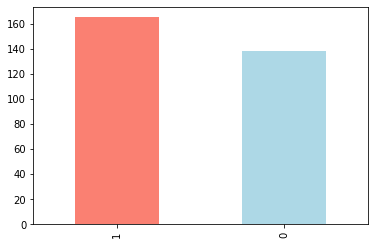

In [5]:
df.target.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Frequency comparision

df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

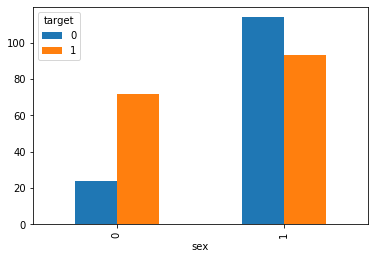

In [6]:
pd.crosstab(df.sex, df.target).plot(kind='bar')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

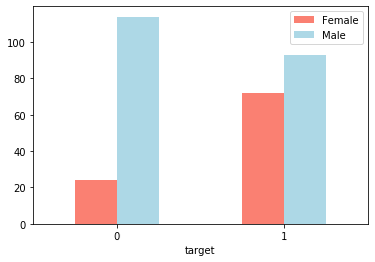

In [14]:
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['salmon','lightblue'])
plt.legend(['Female', 'Male'])
plt.xticks(rotation=-1)

In [16]:
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

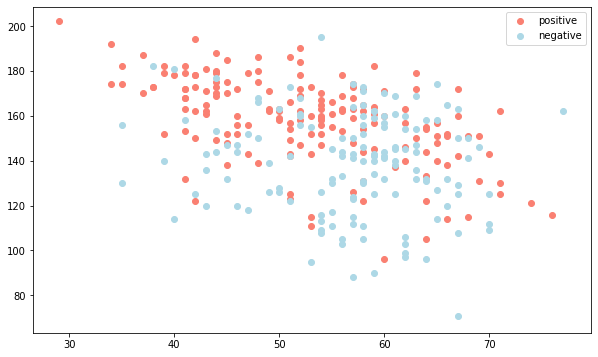

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='salmon')
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='lightblue')
plt.legend(['positive','negative'])

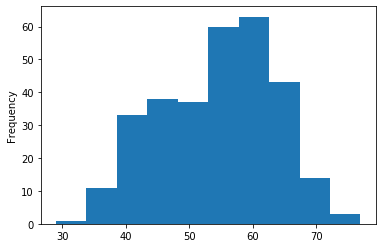

In [27]:
df.age.plot.hist()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

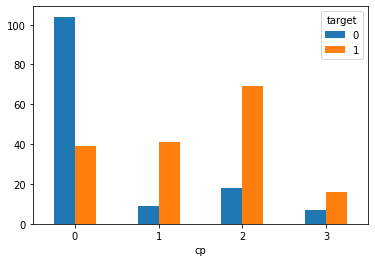

In [32]:
pd.crosstab(df.cp, df.target).plot(kind='bar')
plt.xticks(rotation=1)

In [33]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


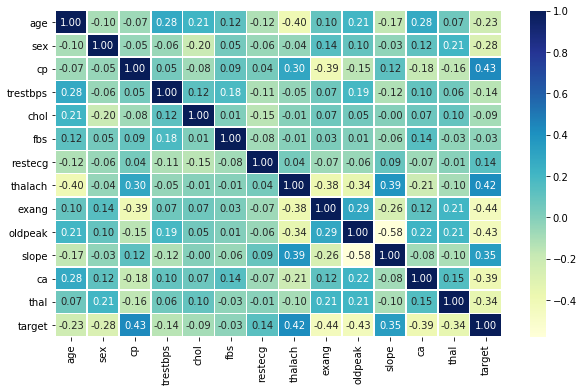

In [53]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr,annot=True,linewidths=0.5, fmt='.2f', cmap='YlGnBu')

In [7]:
np.random.seed(42)
X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {'Logistic Regression' : LogisticRegression(),
          'K Neighbors Classifier' : KNeighborsClassifier(),
          'RandomForestClassifier' : RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''fits and evaluates diff scikit learn models present in the model dict'''
    np.random.seed(42)
    results_dict = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        results_dict[name] = model.score(X_test, y_test)
        
    print(results_dict)
    return results_dict

In [9]:
model_score = fit_and_score(models, X_train, X_test, y_train, y_test)

C:\Users\AAA\Desktop\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442, 'K Neighbors Classifier': 0.6885245901639344, 'RandomForestClassifier': 0.8360655737704918}


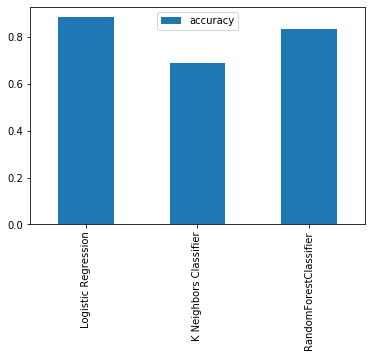

In [24]:
comp = pd.DataFrame(model_score, index=['accuracy'])
comp.T.plot.bar()

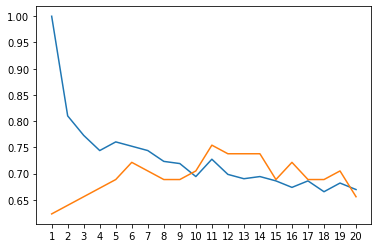

In [31]:
tr=[]
te=[]
neigh = range(1,21)
np.random.seed(42)
knn = KNeighborsClassifier()
for i in range(1,21):
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    te.append(knn.score(X_test, y_test))
    tr.append(knn.score(X_train, y_train))
    
plt.plot(neigh, tr, label='Train SCore')
plt.plot(neigh, te, label='Test SCore')
plt.legend
plt.xticks(np.arange(1,21));

In [27]:
# tuning a logistic regression model
log_grid = {'C' : np.logspace(-4,4,20),
            'solver' : ['liblinear']}

np.random.seed(42)
rs_log_model = RandomizedSearchCV(LogisticRegression(),
                param_distributions=log_grid,
                cv=5,
                n_iter=20,
                verbose=True)
rs_log_model.fit(X_train, y_train)
rs_log_model.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


0.8852459016393442

In [24]:
rs_log_model.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [28]:
log_grid={'C': np.logspace(-4,4,20),
          'solver':['liblinear']}

np.random.seed(42)
gs_log_model = GridSearchCV(LogisticRegression(),
                            param_grid=log_grid,
                            cv=5,
                            verbose=True)
gs_log_model.fit(X_train, y_train)
gs_log_model.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


0.8852459016393442

In [30]:
# tuning a RandomForest model
rand_grid = {'n_estimators':np.arange(10,1000,50), 
            'max_depth':[None, 3,5,10],
            'min_samples_split':np.arange(2,20,2),
            'min_samples_leaf':np.arange(1,20,2)}
np.random.seed(42)
rs_rand_model = GridSearchCV(RandomForestClassifier(),
                                   param_grid=rand_grid,
                                   cv=5,
                                   verbose=True)
rs_rand_model.fit(X_train, y_train)
rs_rand_model.score(X_test, y_test)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

(<sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0xcf94390>, 61, 61)

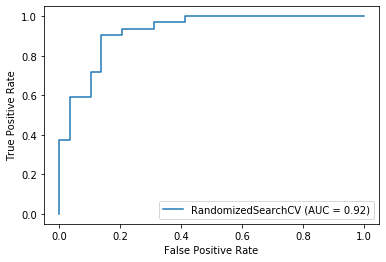

In [42]:
y_preds = rs_log_model.predict(X_test)
plot_roc_curve(rs_log_model, X_test, y_test), len(y_test), len(y_preds)

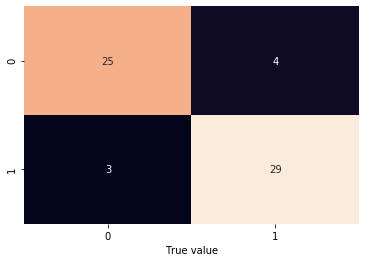

In [48]:
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots()
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    ax.set(xlabel="True value")
    
plot_conf_mat(y_test, y_preds)

In [50]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

